In [1]:
!pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36056 sha256=e5520b1885f481241e355dd4c9653d5468ba56556db208a4ab3b98a66897e387
  Stored in directory: /home/fidel/.cache/pip/wheels/ba/d6/a0/a2c830ea2a083f15d9790732c1908625dd6314a02f09a92130
Successfully built nsepy


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style


In [5]:
stocksymbols = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']
startdate = date(2019,10,14)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )


2025-05-04
You have 8 assets in your porfolio


In [7]:
df = pd.DataFrame()
for i in range(len(stocksymbols)):
    data = gh(symbol=stocksymbols[i],start=startdate, end=(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace=True)
    data.drop(['Symbol'], axis=1,inplace=True)
    if i == 0:
        df = data
    if i != 0:
        df = df.join(data)
df


Exception in thread Thread-5 (get_history):
Traceback (most recent call last):
  File "/home/fidel/anaconda3/lib/python3.12/site-packages/urllib3/connection.py", line 199, in _new_conn
Exception in thread Thread-7 (get_history):
Traceback (most recent call last):
  File "/home/fidel/anaconda3/lib/python3.12/site-packages/urllib3/connection.py", line 199, in _new_conn
Exception in thread Thread-9 (get_history):
Traceback (most recent call last):
  File "/home/fidel/anaconda3/lib/python3.12/site-packages/urllib3/connection.py", line 199, in _new_conn
Exception in thread Thread-11 (get_history):
Traceback (most recent call last):
  File "/home/fidel/anaconda3/lib/python3.12/site-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/fidel/anaconda3/lib/python3.12/site-packages/urllib3/util/connection.py", line 60, in create_connection
    sock = connection.create_connection(
           ^^^^^^^

AttributeError: 'ThreadReturns' object has no attribute 'result'

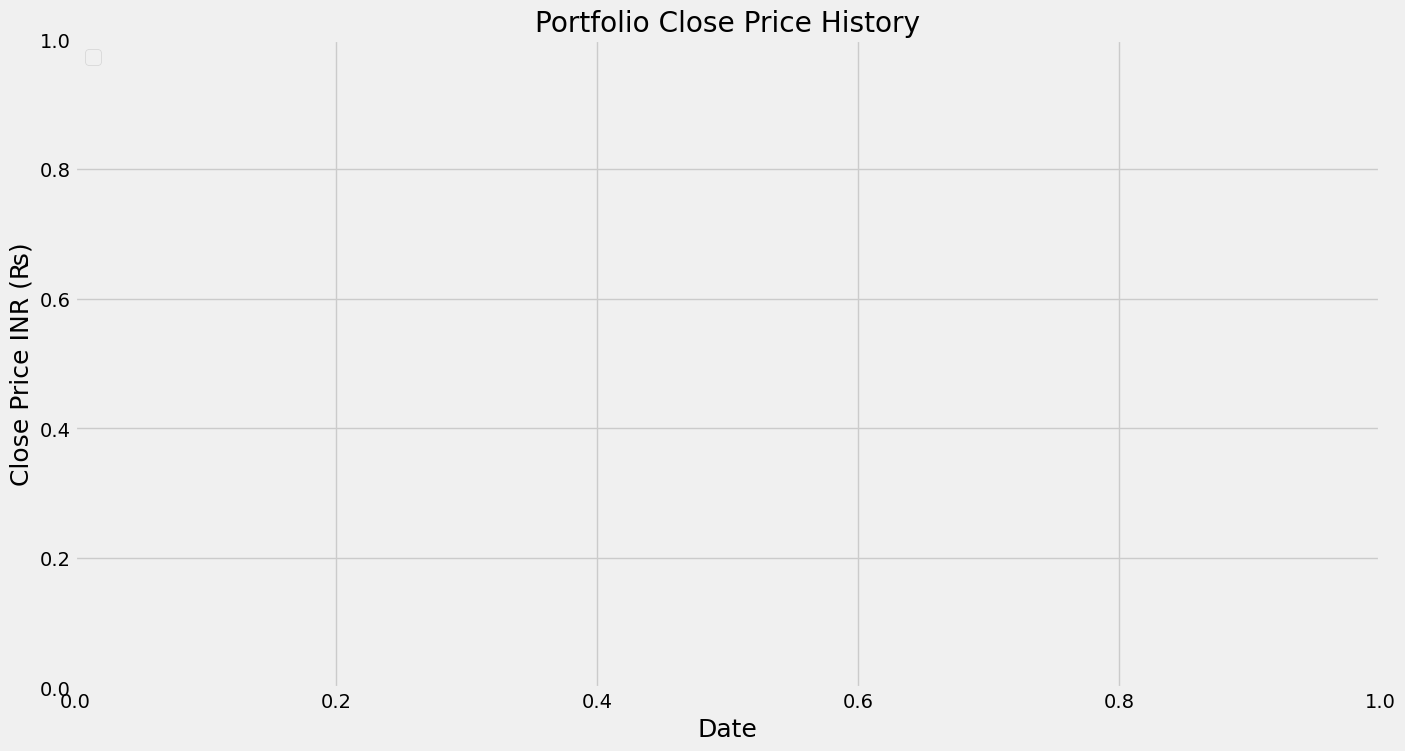

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)


In [11]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix


""


In [13]:
df = pd.DataFrame()

for i, symbol in enumerate(stocksymbols):
    data = gh(symbol=symbol, start=startdate, end=end_date)[['Symbol', 'Close']]
    data.rename(columns={'Close': symbol}, inplace=True)
    data.drop('Symbol', axis=1, inplace=True)
    
    if df.empty:
        df = data
    else:
        df = df.join(data)

df


,RELIANCE
Date,


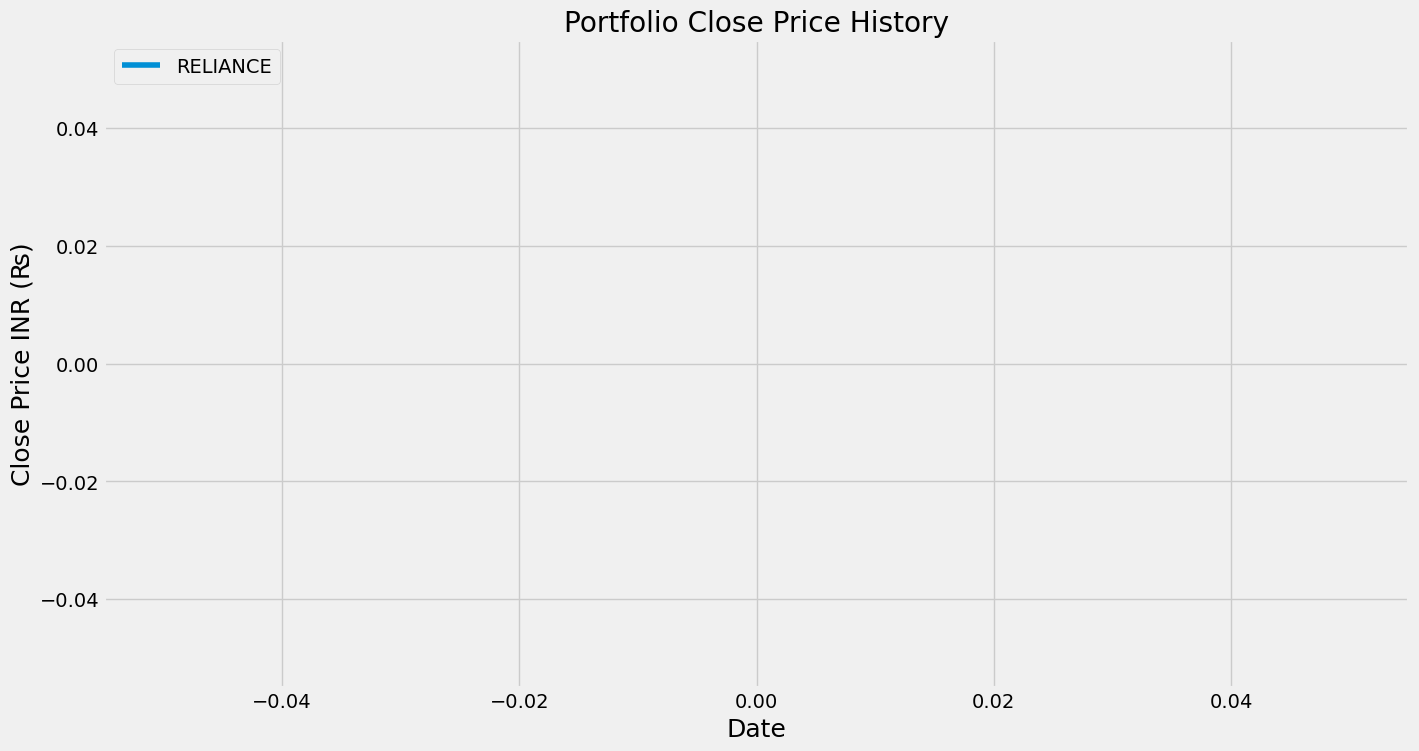

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)


In [17]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix


,RELIANCE
RELIANCE,NaN


/home/fidel/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/fidel/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Correlation between Stocks in your portfolio


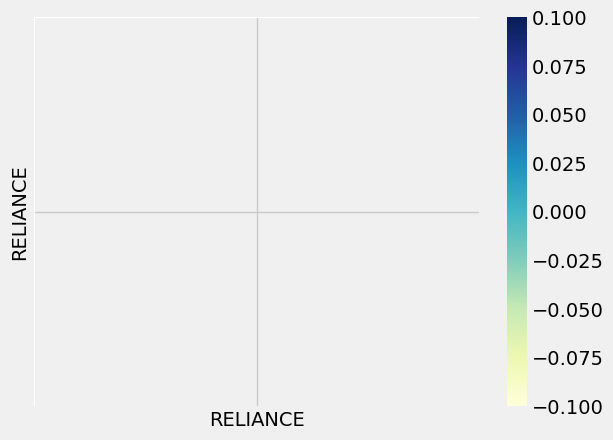

In [19]:
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)


In [21]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return


,RELIANCE
Date,


Daily simple returns


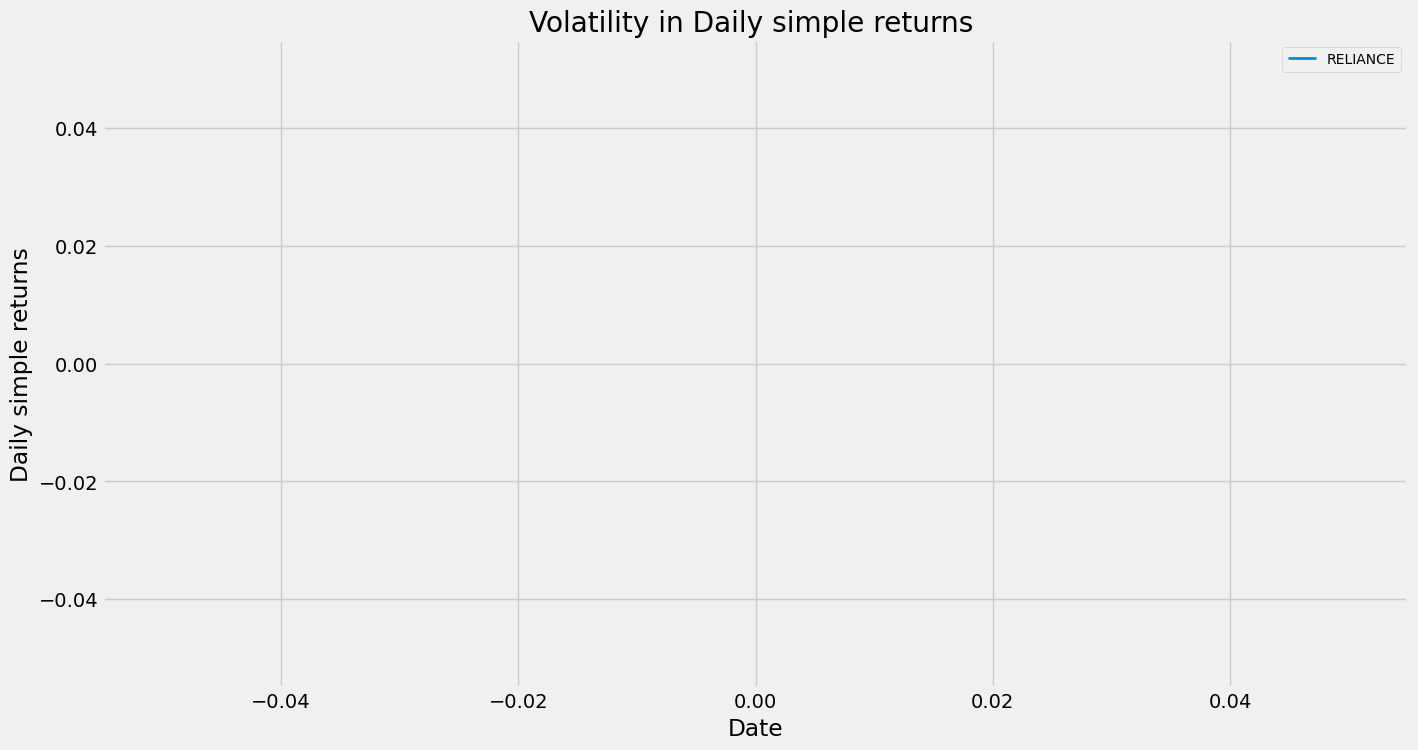

In [23]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)


In [25]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)


Average Daily returns(%) of stocks in your portfolio
RELIANCE    NaN
dtype: object


In [27]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


TypeError: no numeric data to plot